개요 : 이미지 결과 저장하기

+ [x] 1.Import / GCP 설정
+ [x] 2.데이터 확인
+ [x] 3.Detecting Object
+ [x] 4.결과 저장


In [1]:
# !pip install --upgrade google-api-python-client
# !pip install --upgrade google-cloud-vision
# !pip install --upgrade tensorflow

### 1.Import / GCP 설정

In [1]:
import hashlib
# import io
import logging
import os
import random
import re

import contextlib2
from lxml import etree
import numpy as np
import PIL.Image
import tensorflow as tf

import argparse

from google.cloud import vision

import urllib
import cv2
import matplotlib as mpl
from skimage import io
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline  
mpl.rc('figure', figsize=(8, 10 ))

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="./vision API-06a448b64428.json"

### 2.Data 확인

In [3]:
url_img1 = 'https://www.maeildo.com/imageserver/cm/2019/07/16c46576ad11.jpg'

In [5]:
def image_read(url):
    img1_url = url
    img1 = io.imread(img1_url)
    return img1

In [6]:
def image_read_v2(url, min_ton):
    img1_url = url
    img1 = io.imread(img1_url)
    ret, img1 = cv2.threshold(img1,min_ton, 255, cv2.THRESH_BINARY)
    #이미지 저장하기
    cv2.imwrite('./threshold' + str(min_ton) + '.jpg', img1)
    return img1

In [41]:
# plt.figure(figsize=(8,12))
# plt.subplot(4,1,1); plt.imshow(image_read(url_img1)); plt.xticks([]); plt.yticks([])
# plt.subplot(4,1,2); plt.imshow(image_read_v2(url_img1, 20)); plt.xticks([]); plt.yticks([])
# plt.subplot(4,1,3); plt.imshow(image_read_v2(url_img1, 40)); plt.xticks([]); plt.yticks([])
# plt.subplot(4,1,4); plt.imshow(image_read_v2(url_img1, 60)); plt.xticks([]); plt.yticks([])
# plt.show()

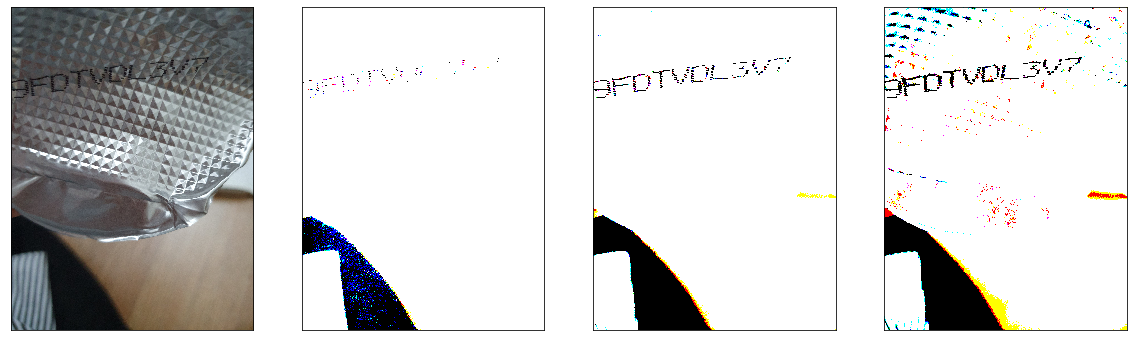

In [8]:
plt.figure(figsize=(20,8))
plt.subplot(1,4,1); plt.imshow(image_read(url_img1)); plt.xticks([]); plt.yticks([])
plt.subplot(1,4,2); plt.imshow(image_read_v2(url_img1, 20)); plt.xticks([]); plt.yticks([])
plt.subplot(1,4,3); plt.imshow(image_read_v2(url_img1, 40)); plt.xticks([]); plt.yticks([])
plt.subplot(1,4,4); plt.imshow(image_read_v2(url_img1, 60)); plt.xticks([]); plt.yticks([])
plt.show()

### 3-2. 문서감지(local)

In [33]:
def detect_document(path):
    """Detects document features in an image."""
    import io
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)
    response = client.document_text_detection(image=image)
    for page in response.full_text_annotation.pages:
        for block in page.blocks:
            print('\nBlock confidence: {}\n'.format(block.confidence))

            for paragraph in block.paragraphs:
                print('Paragraph confidence: {}'.format(
                    paragraph.confidence))

                for word in paragraph.words:
                    word_text = ''.join([
                        symbol.text for symbol in word.symbols
                    ])
                    print('Word text: {} (confidence: {})'.format(
                        word_text, word.confidence))

                    for symbol in word.symbols:
                        print('\tSymbol: {} (confidence: {})'.format(
                            symbol.text, symbol.confidence))

In [48]:
%%time

detect_document('./threshold20.jpg')


Block confidence: 0.46000000834465027

Paragraph confidence: 0.46000000834465027
Word text: " (confidence: 0.8600000143051147)
	Symbol: " (confidence: 0.8600000143051147)
Word text: " (confidence: 0.36000001430511475)
	Symbol: " (confidence: 0.36000001430511475)
Word text: " (confidence: 0.1599999964237213)
	Symbol: " (confidence: 0.1599999964237213)

Block confidence: 0.7200000286102295

Paragraph confidence: 0.7200000286102295
Word text: یه (confidence: 0.7200000286102295)
	Symbol: ی (confidence: 0.46000000834465027)
	Symbol: ه (confidence: 0.9800000190734863)

Block confidence: 0.6499999761581421

Paragraph confidence: 0.6499999761581421
Word text: وكي (confidence: 0.6499999761581421)
	Symbol: و (confidence: 0.4099999964237213)
	Symbol: ك (confidence: 0.6000000238418579)
	Symbol: ي (confidence: 0.9599999785423279)
Wall time: 2.55 s


In [49]:
%%time 
detect_document('./threshold40.jpg')


Block confidence: 0.699999988079071

Paragraph confidence: 0.699999988079071
Word text: FDTVOL (confidence: 0.7799999713897705)
	Symbol: F (confidence: 0.7200000286102295)
	Symbol: D (confidence: 0.7099999785423279)
	Symbol: T (confidence: 0.7200000286102295)
	Symbol: V (confidence: 0.9599999785423279)
	Symbol: O (confidence: 0.6200000047683716)
	Symbol: L (confidence: 0.9700000286102295)
Word text: 377 (confidence: 0.5400000214576721)
	Symbol: 3 (confidence: 0.9399999976158142)
	Symbol: 7 (confidence: 0.05000000074505806)
	Symbol: 7 (confidence: 0.6499999761581421)
Wall time: 2.73 s


In [45]:
detect_document('./threshold60.jpg')


Block confidence: 0.7200000286102295

Paragraph confidence: 0.7200000286102295
Word text: FDTVOL (confidence: 0.7599999904632568)
	Symbol: F (confidence: 0.6899999976158142)
	Symbol: D (confidence: 0.6499999761581421)
	Symbol: T (confidence: 0.8600000143051147)
	Symbol: V (confidence: 0.949999988079071)
	Symbol: O (confidence: 0.5)
	Symbol: L (confidence: 0.949999988079071)
Word text: 307 (confidence: 0.6299999952316284)
	Symbol: 3 (confidence: 0.9300000071525574)
	Symbol: 0 (confidence: 0.18000000715255737)
	Symbol: 7 (confidence: 0.7799999713897705)

Block confidence: 0.5400000214576721

Paragraph confidence: 0.5400000214576721
Word text: * (confidence: 0.9100000262260437)
	Symbol: * (confidence: 0.9100000262260437)
Word text: 3 (confidence: 0.17000000178813934)
	Symbol: 3 (confidence: 0.17000000178813934)


In [46]:
# detect_document('./threshold60.jpg')

In [ ]:
for rect in rects:
    # Draw the rectangles
    cv2.rectangle(img, (rect[0], rect[1]), 
                  (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 5) 

plt.figure(figsize=(15,12))
plt.imshow(img)
plt.xticks([]) # x축 눈금
plt.yticks([]) # y축 눈금

### 4.결과 저장

In [46]:
# Excel save
name = '200616_maeili_IMG_add_text.xlsx'
writer = pd.ExcelWriter(name)
df.to_excel(writer, 'Sheet1')
writer.save()

In [31]:
from google.cloud import vision

def image_read_v3(url, min_ton):
    img1_url = url
    # image to array
    img1 = io.imread(img1_url)
    _, img1 = cv2.threshold(img1,min_ton, 255, cv2.THRESH_BINARY)
    
    content = img1.fromarray(resizelist[val])
#     image = vision.types.Image(content=img1)
#     response = client.document_text_detection(image=image)
    return content

In [32]:
image_read_v3(url_img1, 20)

AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [30]:
img1

NameError: name 'img1' is not defined

In [18]:
def detect_document(path):
    """Detects document features in an image."""
    import io
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)
    response = client.document_text_detection(image=image)
    return content

In [20]:
# detect_document('./threshold60.jpg')

## #.object-localization
+ 설명 : `사물` 및 그 `위치`를 확인한다(detect-labels 보다 발견되는 내용은 작음)

In [30]:
def localize_objects_uri(uri):
    """Localize objects in the image on Google Cloud Storage

    Args:
    uri: The path to the file in Google Cloud Storage (gs://...)
    """
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()

    image = vision.types.Image()
    image.source.image_uri = uri

    objects = client.object_localization(
        image=image).localized_object_annotations

    print('Number of objects found: {}'.format(len(objects)))
    for object_ in objects:
        print('\n{} (confidence: {})'.format(object_.name, object_.score))
        print('Normalized bounding polygon vertices: ')
        for vertex in object_.bounding_poly.normalized_vertices:
            print(' - ({}, {})'.format(vertex.x, vertex.y))

In [31]:
localize_objects_uri(img1_url)

Number of objects found: 1

Packaged goods (confidence: 0.8826459050178528)
Normalized bounding polygon vertices: 
 - (0.08354400843381882, 0.0239225085824728)
 - (0.8671166896820068, 0.0239225085824728)
 - (0.8671166896820068, 0.99137282371521)
 - (0.08354400843381882, 0.99137282371521)


In [32]:
localize_objects_uri(img2_url)

Number of objects found: 1

Packaged goods (confidence: 0.8385968804359436)
Normalized bounding polygon vertices: 
 - (0.10974785685539246, 0.028390875086188316)
 - (0.7135946750640869, 0.028390875086188316)
 - (0.7135946750640869, 0.9541881084442139)
 - (0.10974785685539246, 0.9541881084442139)


In [9]:
img2_url = df['IMG_URL'].values[77]

In [8]:
# application
def localize_objects_uri_image(uri):
    """Localize objects in the image on Google Cloud Storage

    Args:
    uri: The path to the file in Google Cloud Storage (gs://...)
    """
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()
    image = vision.types.Image()
    image.source.image_uri = uri

    objects = client.object_localization(image=image).localized_object_annotations
    
    resp = io.imread(uri)
    r, g, b = cv2.split(resp)   # img파일을 b,g,r로 분리
    resp = cv2.merge([r,g,b])   # b, r을 바꿔서 Merge
    height, width, channels = resp.shape

    for object_ in objects:
        for vertex in object_.bounding_poly.normalized_vertices:
            # jason pasing 부분이(항상) 가장 어려웠다 : 특정 자료만 가져오는 경우
            start_x, start_y = object_.bounding_poly.normalized_vertices[0].x, object_.bounding_poly.normalized_vertices[0].y
            end_x, end_y = object_.bounding_poly.normalized_vertices[2].x, object_.bounding_poly.normalized_vertices[2].y
            resp = cv2.rectangle(resp, 
                     (int(round(start_x*width,0)), int(round(start_y*height,0))), 
                     (int(round(end_x*  width,0)), int(round(end_y  *height,0))), 
                     (0,255,0), 3)
            resp = cv2.putText(resp, object_.name, (int(round(start_x*width,0)), int(round(start_y*height,0))), 
                   cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 2)

    plt.figure(figsize=(15,15))
#     plt.subplot(221)
    plt.imshow(resp)
    plt.xticks([]) # x축 눈금
    plt.yticks([]) # y축 눈금
    print(object_.name)

1D barcode


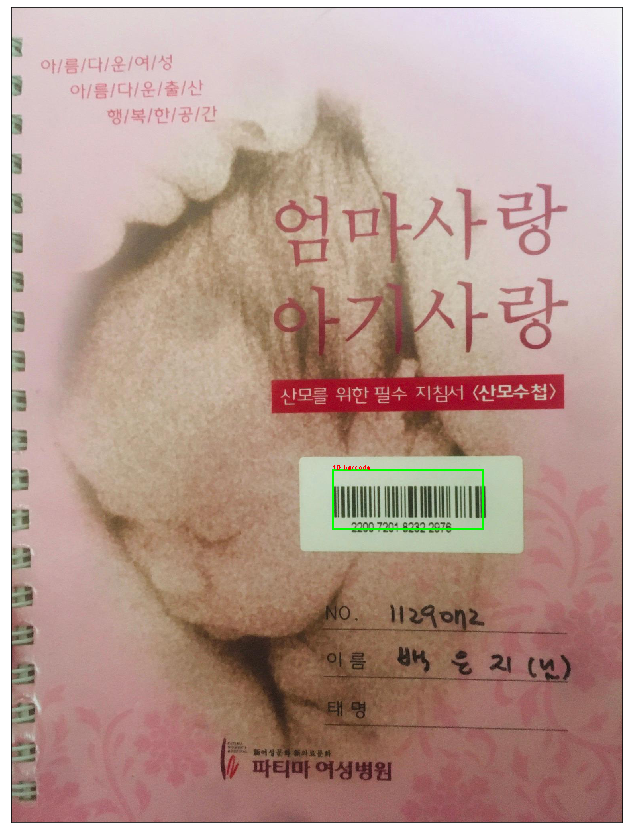

In [11]:
localize_objects_uri_image(img2_url)

Packaged goods


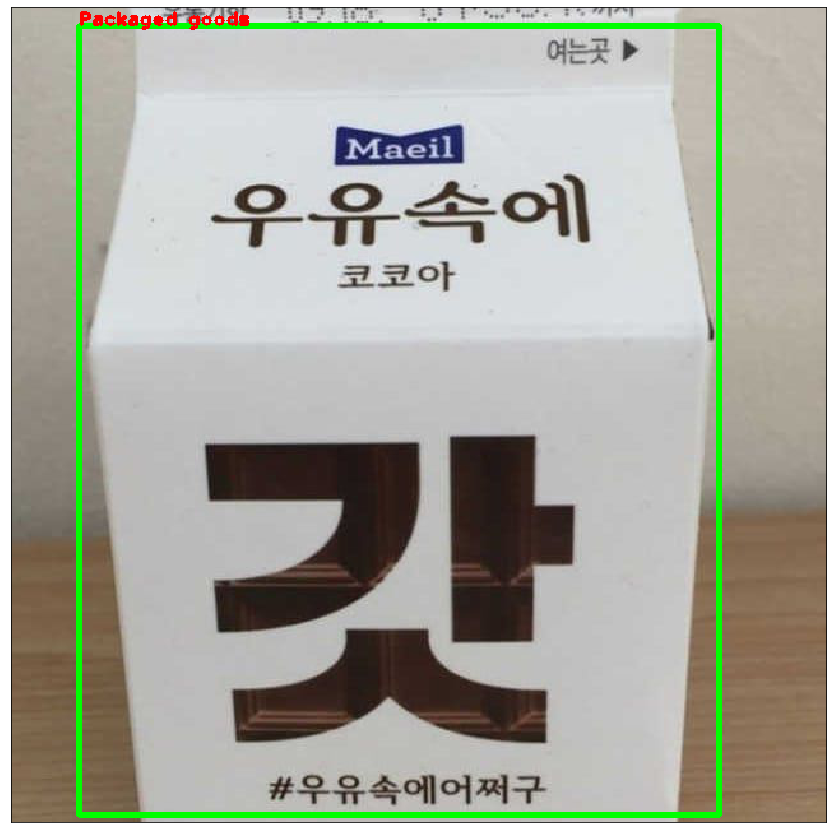

In [35]:
localize_objects_uri_image(img1_url)

Packaged goods


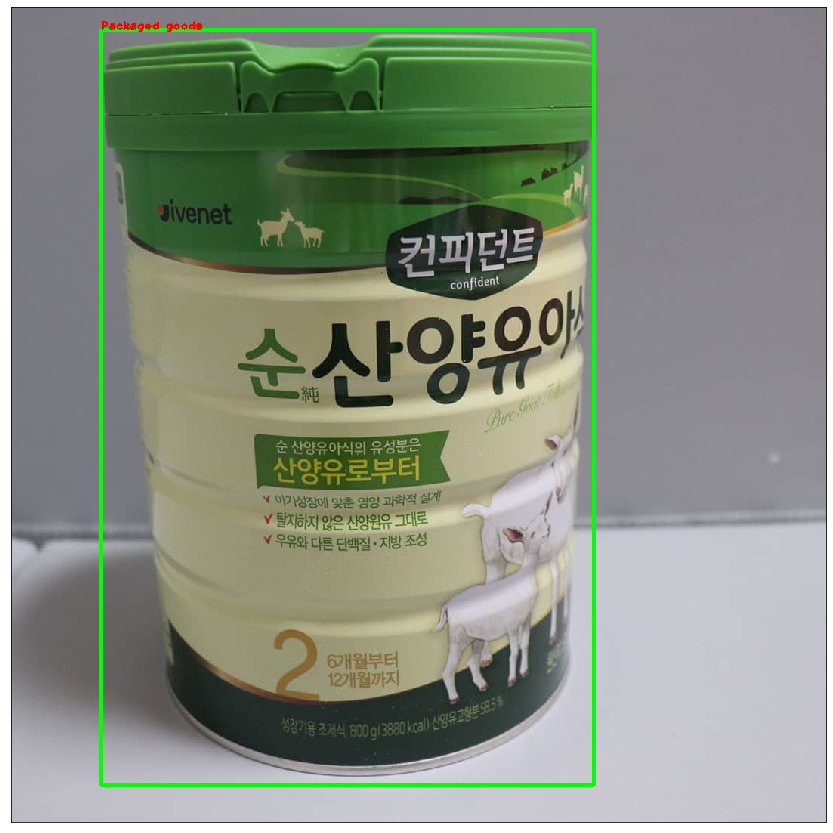

In [36]:
localize_objects_uri_image(img2_url)

## note 실행 : web_detect


In [50]:
#원본 

def detect_labels_uri(uri):
    """Detects labels in the file located in Google Cloud Storage or on the
    Web."""
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()
    image = vision.types.Image()
    image.source.image_uri = uri

    response = client.label_detection(image=image)
    labels = response.label_annotations
    text = []
    for label in labels:
        text.append(label.description)
    return text
#     print('Labels:')
    



In [51]:
detect_labels_uri(img1_url)

[]

In [56]:
detect_labels_uri(img3_url)

Labels:
Text
Nose


### 텍스트감지(원격)

In [8]:
def detect_text_uri(uri):
    """Detects text in the file located in Google Cloud Storage or on the Web.
    """
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()
    image = vision.types.Image()
    image.source.image_uri = uri

    response = client.text_detection(image=image)
    texts = response.text_annotations
    
    print('Texts:')
    print(response.text_annotations[1].description)
    print(response.text_annotations[1].bounding_poly.vertices[0].x, response.text_annotations[1].bounding_poly.vertices[0].y)
    print(response.text_annotations[1].bounding_poly.vertices[2])

In [9]:
detect_text_uri(url_img1)

Texts:


IndexError: list index (1) out of range

In [10]:
def detect_text_url(uri):
    """Detects text in the file located in Google Cloud Storage or on the Web.
    """
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()
    image = vision.types.Image()
    image.source.image_uri = uri

    response = client.text_detection(image=image)
    texts = response.text_annotations
    
    resp = io.imread(uri)
    r, g, b = cv2.split(resp)   # img파일을 b,g,r로 분리
    resp = cv2.merge([r,g,b])   # b, r을 바꿔서 Merge
    height, width, channels = resp.shape
    
    for i in range(1,len(response.text_annotations)-1):
        object_ = response.text_annotations[i]
        for vertex in object_.description:
#             # jason pasing 부분이(항상) 가장 어려웠다 : 특정 자료만 가져오는 경우
            start_x, start_y = object_.bounding_poly.vertices[0].x, object_.bounding_poly.vertices[0].y
            end_x, end_y = object_.bounding_poly.vertices[2].x, object_.bounding_poly.vertices[2].y
            resp = cv2.rectangle(resp, 
                     (int(round(start_x, 0)), int(round(start_y, 0))), 
                     (int(round(end_x  , 0)), int(round(end_y  , 0))), 
                     (0,255,0), 3)
            resp = cv2.putText(resp, object_.description, (int(round(start_x, 0)), int(round(start_y, 0))), 
                   cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 2)

    plt.figure(figsize=(15,15))
    plt.imshow(resp)
    plt.xticks([]) # x축 눈금
    plt.yticks([]) # y축 눈금


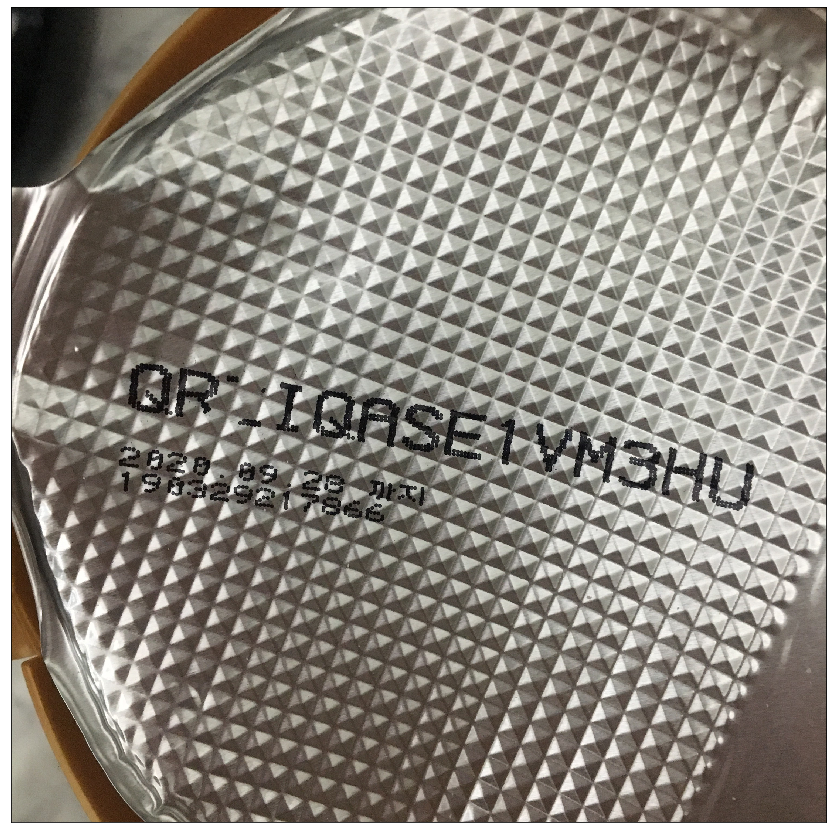

In [11]:
detect_text_url(url_img1)

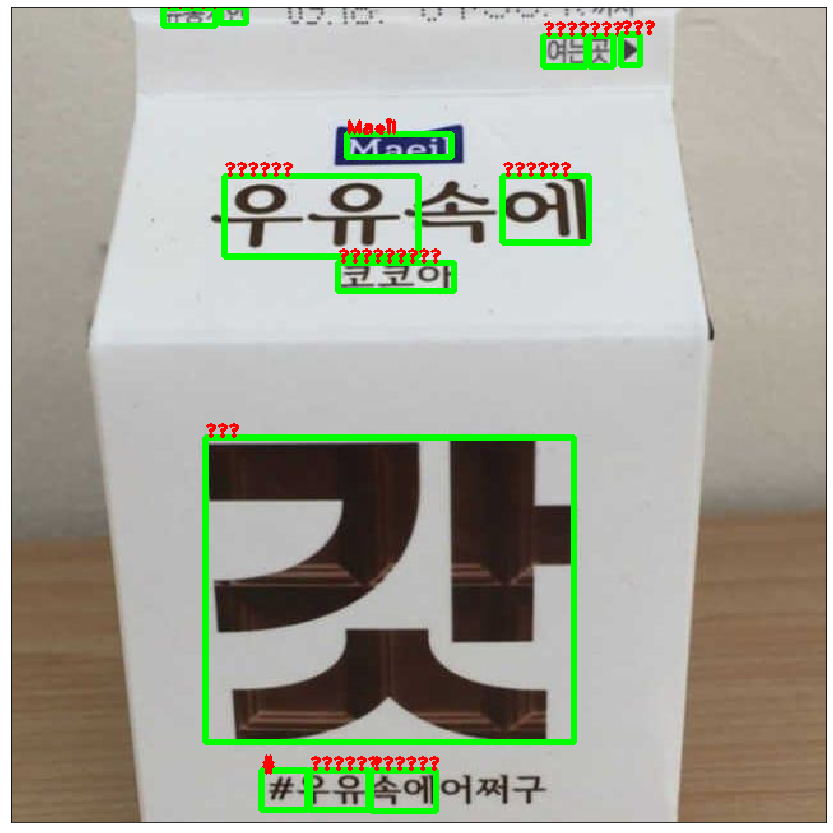

In [10]:
detect_text_url(img1_url)

In [174]:
from google.cloud import vision
client = vision.ImageAnnotatorClient()
image = vision.types.Image()
image.source.image_uri = img1_url

response = client.text_detection(image=image)
texts = response.text_annotations[0]

try:
    word = texts[0].description.split('\n')[:-1]
except : 
    pass

print(len(word))

7


In [182]:
word

['유동기한', '여는곳 ▶', 'Maeil', '우유속에', '코코아', '갓', '#우유속에어쩌구']

13

In [22]:
from google.cloud import vision
client = vision.ImageAnnotatorClient()
image = vision.types.Image()
image.source.image_uri = url_img1

response = client.text_detection(image=image)
texts = response.text_annotations
word =[]

try:
    word = texts[0].description.split('\n')[:-1]
    print(word)
except : 
    pass

In [14]:
from google.cloud import vision
client = vision.ImageAnnotatorClient()
image = vision.types.Image()
image.source.image_uri = url_img1

response = client.text_detection(image=image)
texts = response.text_annotations

if len(texts) > 1:
    print(texts[0].description)
else:
    print('0')    


0


In [146]:
texts

[]

### 문서감지(원격)

In [15]:
def detect_document_url(uri):
    """Detects document features in the file located in Google Cloud
    Storage."""
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()
    image = vision.types.Image()
    image.source.image_uri = uri

    response = client.document_text_detection(image=image)

    for page in response.full_text_annotation.pages:
        for block in page.blocks:
            print('\nBlock confidence: {}\n'.format(block.confidence))

            for paragraph in block.paragraphs:
                print('Paragraph confidence: {}'.format(
                    paragraph.confidence))

                for word in paragraph.words:
                    word_text = ''.join([
                        symbol.text for symbol in word.symbols
                    ])
                    print('Word text: {} (confidence: {})'.format(
                        word_text, word.confidence))

#                     for symbol in word.symbols:
#                         print('\tSymbol: {} (confidence: {})'.format(
#                             symbol.text, symbol.confidence))

In [20]:
url_img1 = 'https://www.maeildo.com/imageserver/cm/2019/07/16c35642be48.HEIC'

In [21]:
detect_document_url(url_img1)

In [14]:
detect_document_url(img1_url)


Block confidence: 0.8999999761581421

Paragraph confidence: 0.8999999761581421
Word text: 유통기한 (confidence: 0.8999999761581421)
	Symbol: 유 (confidence: 0.9700000286102295)
	Symbol: 통 (confidence: 0.8199999928474426)
	Symbol: 기 (confidence: 0.9100000262260437)
	Symbol: 한 (confidence: 0.9300000071525574)

Block confidence: 0.5099999904632568

Paragraph confidence: 0.5099999904632568
Word text: 13 (confidence: 0.5699999928474426)
	Symbol: 1 (confidence: 0.38999998569488525)
	Symbol: 3 (confidence: 0.7599999904632568)
Word text: . (confidence: 0.25)
	Symbol: . (confidence: 0.25)
Word text: 1 (confidence: 0.6499999761581421)
	Symbol: 1 (confidence: 0.6499999761581421)

Block confidence: 0.699999988079071

Paragraph confidence: 0.699999988079071
Word text: . (confidence: 0.09000000357627869)
	Symbol: . (confidence: 0.09000000357627869)
Word text: . (confidence: 0.6200000047683716)
	Symbol: . (confidence: 0.6200000047683716)
Word text: 끼시 (confidence: 0.8399999737739563)
	Symbol: 끼 (confiden

In [25]:
from google.cloud import vision
client = vision.ImageAnnotatorClient()
image = vision.types.Image()
image.source.image_uri = img3_url

response = client.document_text_detection(image=image)
response.text_annotations[0].description

In [18]:
response.text_annotations[0].description

IndexError: list index (0) out of range

In [19]:
for i in range(1,len(response.text_annotations)):
    print(response.text_annotations[i].description)